In [1]:
from crypto_volatility_lab.data_construction import CryptoScraper, TimeSeriesCreator
import matplotlib.pyplot as plt
import numpy as np

# Web Scraping

### Récupération d'une seule currency

In [2]:
crypto_scraper = CryptoScraper()
bitcoin_data = crypto_scraper.get_data_for_currency('BTC-USD')

In [ ]:
print(bitcoin_data.shape)
bitcoin_data.head()

#### Création des time series

In [ ]:
ts_creator = TimeSeriesCreator(data=bitcoin_data, date_column_name='Date', value_column_name='Close')
log_returns = ts_creator.create_log_return_time_series()
volatility = ts_creator.create_volatility_time_series()

bitcoin_data["Log Returns"] = log_returns
bitcoin_data["Volatility"] = volatility
bitcoin_data.head(5)

In [ ]:
# sort the data by descending date
bitcoin_data = bitcoin_data.sort_values(by="Date", ascending=True)

# plotting time series by date
fig, ax = plt.subplots(3, 1, figsize=(12, 8))

ax[0].plot(bitcoin_data["Date"], bitcoin_data["Close"])
ax[0].set_title("Bitcoin Price")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Price")

ax[1].plot(bitcoin_data["Date"], bitcoin_data["Log Returns"])
ax[1].set_title("Log Returns")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Log Returns")

ax[2].plot(bitcoin_data["Date"], bitcoin_data["Volatility"])
ax[2].set_title("Volatility")
ax[2].set_xlabel("Date")
ax[2].set_ylabel("Volatility")



plt.tight_layout()
plt.show()

In [ ]:
bitcoin_data = bitcoin_data.dropna()

# time split
train_size = int(0.8 * bitcoin_data.shape[0])
train_data = bitcoin_data.iloc[:train_size]
test_data = bitcoin_data.iloc[train_size:]

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train_data["Date"], train_data["Close"], label="Train")
ax.plot(test_data["Date"], test_data["Close"], label="Test")
start_date = train_data["Date"].min().strftime('%Y-%m-%d')
split_date = test_data["Date"].min().strftime('%Y-%m-%d')
end_date = test_data["Date"].max().strftime('%Y-%m-%d')

ax.set_title(f"Bitcoin Price\n(Start: {start_date}, Split: {split_date}, End: {end_date})")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend()
plt.show()


### LSTM

In [ ]:
from crypto_volatility_lab.modeling import LSTMPipeline

pipeline = LSTMPipeline(forecast_horizon=1, epochs=80, batch_size=32, validation_split=0.1)

model = pipeline.fit(train_data[["Volatility"]].values, train_data["Volatility"].values.astype(np.float64))

In [ ]:
pipeline.evaluate_metrics(train_data[["Volatility"]].values, train_data["Volatility"].values.astype(np.float64))
pipeline.evaluate_metrics(test_data[["Volatility"]].values, test_data["Volatility"].values.astype(np.float64))

In [ ]:
history = pipeline.get_history()

# plot the training and validation loss
plt.figure(figsize=(12, 8))
plt.plot(history["loss"], label="Training Loss")
plt.plot(history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# plot y_pred
y_pred = pipeline.predict(train_data[["Volatility"]].values)

# plot the predicted volatility
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_data["Date"], train_data["Volatility"], label="True Volatility")
ax.plot(train_data["Date"][-len(y_pred):], y_pred, label="Predicted Volatility")
ax.set_title("Predicted Volatility")

# predict on test data
y_test_pred = pipeline.predict(test_data[["Volatility"]].values)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(test_data["Date"], test_data["Volatility"], label="True Volatility")
ax.plot(test_data["Date"][-len(y_test_pred):], y_test_pred, label="Predicted Volatility")
ax.set_title("Predicted Volatility")

### Modèle GRU

In [ ]:
from crypto_volatility_lab.modeling import GRUPipeline

pipeline = GRUPipeline(forecast_horizon=1, epochs=80, batch_size=32, validation_split=0.1)

model = pipeline.fit(train_data[["Volatility"]].values, train_data["Volatility"].values.astype(np.float64))

In [ ]:
pipeline.evaluate_metrics(train_data[["Volatility"]].values, train_data["Volatility"].values.astype(np.float64))
pipeline.evaluate_metrics(test_data[["Volatility"]].values, test_data["Volatility"].values.astype(np.float64))

In [ ]:
history = pipeline.get_history()

# plot the training and validation loss
plt.figure(figsize=(12, 8))
plt.plot(history["loss"], label="Training Loss")
plt.plot(history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# plot y_pred
y_pred = pipeline.predict(train_data[["Volatility"]].values)

# plot the predicted volatility
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_data["Date"], train_data["Volatility"], label="True Volatility")
ax.plot(train_data["Date"][-len(y_pred):], y_pred, label="Predicted Volatility")
ax.set_title("Predicted Volatility")

# predict on test data
y_test_pred = pipeline.predict(test_data[["Volatility"]].values)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(test_data["Date"], test_data["Volatility"], label="True Volatility")
ax.plot(test_data["Date"][-len(y_test_pred):], y_test_pred, label="Predicted Volatility")
ax.set_title("Predicted Volatility")

### Modèle GRU-LSTM

In [ ]:
from crypto_volatility_lab.modeling import LSTMGRUPipeline

pipeline = LSTMGRUPipeline(forecast_horizon=1, epochs=80, batch_size=32, validation_split=0.1)

model = pipeline.fit(train_data[["Volatility"]].values, train_data["Volatility"].values.astype(np.float64))

In [ ]:
pipeline.evaluate_metrics(train_data[["Volatility"]].values, train_data["Volatility"].values.astype(np.float64))
pipeline.evaluate_metrics(test_data[["Volatility"]].values, test_data["Volatility"].values.astype(np.float64))

In [ ]:
history = pipeline.get_history()

# plot the training and validation loss
plt.figure(figsize=(12, 8))
plt.plot(history["loss"], label="Training Loss")
plt.plot(history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# plot y_pred
y_pred = pipeline.predict(train_data[["Volatility"]].values)

# plot the predicted volatility
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_data["Date"], train_data["Volatility"], label="True Volatility")
ax.plot(train_data["Date"][-len(y_pred):], y_pred, label="Predicted Volatility")
ax.set_title("Predicted Volatility")

# predict on test data
y_test_pred = pipeline.predict(test_data[["Volatility"]].values)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(test_data["Date"], test_data["Volatility"], label="True Volatility")
ax.plot(test_data["Date"][-len(y_test_pred):], y_test_pred, label="Predicted Volatility")
ax.set_title("Predicted Volatility")

## Portfolio Optimization

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Dict
from datetime import datetime

# Assuming these classes/functions are predefined or available
# - crypto_scraper.get_data_for_currency
# - TimeSeriesCreator
# - LSTMGRUPipeline

def process_crypto_indices(indices: List[str], test_start_date: str):
    """
    Process multiple cryptocurrency indices using the same test period but separate train periods.

    Args:
        indices (List[str]): List of cryptocurrency indices (e.g., ['ETH-USD', 'LTC-USD']).
        test_start_date (str): The start date for the test period (format: 'YYYY-MM-DD').

    Returns:
        Dict: A dictionary containing trained models, predictions, and evaluation metrics.
    """
    results = {}
    test_start_date = datetime.strptime(test_start_date, "%Y-%m-%d")

    for index in indices:
        print(f"Processing {index}...")
        
        # Fetch data
        data = crypto_scraper.get_data_for_currency(index)
        
        # Create time series features
        ts_creator = TimeSeriesCreator(data=data, date_column_name='Date', value_column_name='Close')
        log_returns = ts_creator.create_log_return_time_series()
        volatility = ts_creator.create_volatility_time_series()

        data["Log Returns"] = log_returns
        data["Volatility"] = volatility
        data = data.sort_values(by="Date", ascending=True)
        data = data.dropna()

        # Split into train and test based on the test_start_date
        train_data = data[data['Date'] < test_start_date]
        test_data = data[data['Date'] >= test_start_date]

        # Prepare input and output features
        X_train = train_data[["Volatility"]].values
        y_train = train_data["Volatility"].values.astype(np.float64)
        X_test = test_data[["Volatility"]].values
        y_test = test_data["Volatility"].values.astype(np.float64)

        # Train the model
        pipeline = LSTMGRUPipeline(forecast_horizon=1, epochs=80, batch_size=32, validation_split=0.1)
        model = pipeline.fit(X_train, y_train)

        # Evaluate metrics
        train_metrics = pipeline.evaluate_metrics(X_train, y_train)
        test_metrics = pipeline.evaluate_metrics(X_test, y_test)

        # Predict values
        y_train_pred = pipeline.predict(X_train)
        y_test_pred = pipeline.predict(X_test)

        # Collect results
        results[index] = {
            "model": model,
            "train_metrics": train_metrics,
            "test_metrics": test_metrics,
            "y_train_pred": y_train_pred,
            "y_test_pred": y_test_pred,
            "train_data": train_data,
            "test_data": test_data
        }

        # Plot training loss
        history = pipeline.get_history()
        plt.figure(figsize=(12, 8))
        plt.plot(history["loss"], label="Training Loss")
        plt.plot(history["val_loss"], label="Validation Loss")
        plt.title(f"Training and Validation Loss for {index}")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

        # Plot predicted vs actual for train
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.plot(train_data["Date"], train_data["Volatility"], label="True Volatility")
        ax.plot(train_data["Date"][-len(y_train_pred):], y_train_pred, label="Predicted Volatility")
        ax.set_title(f"Predicted Volatility on Train Data for {index}")
        ax.legend()
        plt.show()

        # Plot predicted vs actual for test
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.plot(test_data["Date"], test_data["Volatility"], label="True Volatility")
        ax.plot(test_data["Date"][-len(y_test_pred):], y_test_pred, label="Predicted Volatility")
        ax.set_title(f"Predicted Volatility on Test Data for {index}")
        ax.legend()
        plt.show()

    return results


In [ ]:
# Example usage
results = process_crypto_indices(['BTC-USD', 'ETH-USD', 'LTC-USD'], '2023-01-01')

In [31]:
y_test_predictions = {}
for key in results.keys():
    key_modified = key.replace("-", "_")
    y_test_predictions[f"y_test_{key_modified}_pred"] = results[key]['y_test_pred'].flatten()

volatility_time_series = pd.DataFrame(y_test_predictions)

In [32]:
import numpy as np
import pandas as pd

def compute_weights(volatility_time_series):
    """
    Compute weights based on the formula provided in the image.

    Args:
        volatility_time_series (pd.DataFrame): A pandas DataFrame containing volatility values
        for each time period and for each asset (n_time_periods, n_assets).
        The total of weights for each row should sum up to 1.

    Returns:
        np.array: An array of weights.
    """
    # Compute the inverse of the volatility
    inverse_volatility = 1 / volatility_time_series

    # Normalize so that weights sum to 1 for each time period
    weights = inverse_volatility.div(inverse_volatility.sum(axis=1), axis=0)
    assert np.allclose(weights.sum(axis=1), 1), "Weights do not sum to 1 for each time period."
    return weights.values

weights = compute_weights(volatility_time_series)

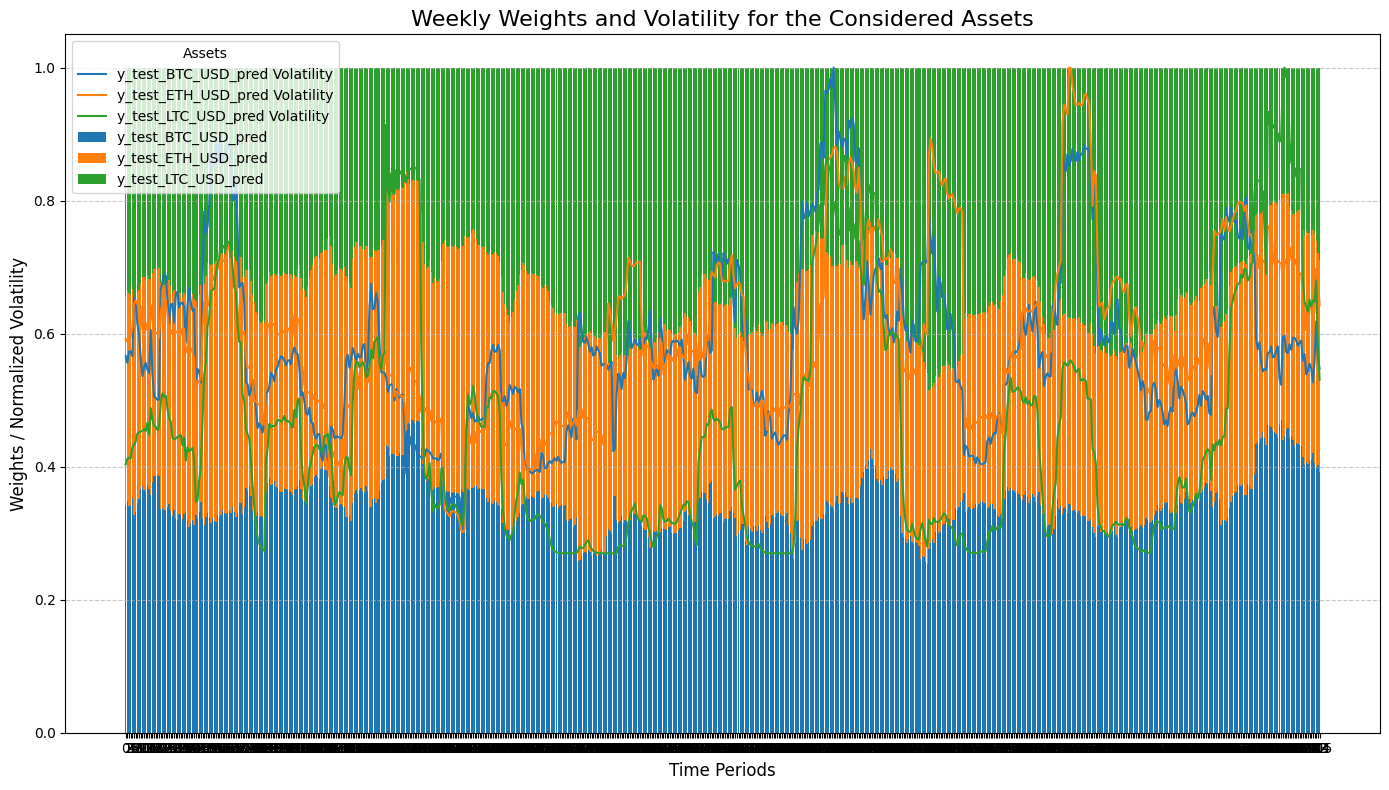

In [40]:
# Conversion en DataFrame pour faciliter le traçage
weights_df = pd.DataFrame(weights, columns=volatility_time_series.columns)

# Création du graphique
plt.figure(figsize=(14, 8))

# Tracer chaque colonne comme une barre empilée
bottom_values = np.zeros(len(weights))  # Initialisation des bases pour les barres empilées
for column in weights_df.columns:
    plt.bar(weights_df.index, weights_df[column], bottom=bottom_values, label=column)
    bottom_values += weights_df[column]

# Ajouter une ligne pour chaque série temporelle de volatilité
for column in volatility_time_series.columns:
    plt.plot(volatility_time_series.index, 
             volatility_time_series[column] / volatility_time_series[column].max(), linestyle='-', label=f"{column} Volatility", alpha=1)

# Configuration du graphique
plt.title("Weekly Weights and Volatility for the Considered Assets", fontsize=16)
plt.xlabel("Time Periods", fontsize=12)
plt.ylabel("Weights / Normalized Volatility", fontsize=12)
plt.xticks(weights_df.index)  # Mettre des index sur l'axe x
plt.legend(title="Assets", fontsize=10, loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher le graphique
plt.tight_layout()
plt.show()